
#  data classification 






In [ ]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
from testCases import * # Download from my github and add to your file folder
import sklearn
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset # Download from my github and add to your file folder
np.random.seed(1) # set a seed so that the results are consistent

In [154]:
X, Y = load_planar_dataset()

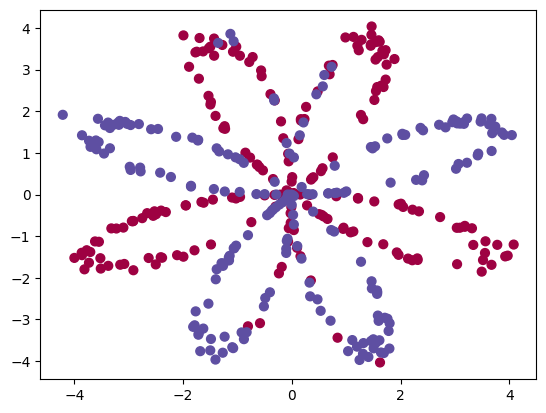

In [155]:
# Visualize the data:
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [156]:
shape_X=X.shape
shape_Y=Y.shape
m=shape_X[1]

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!



## 1 - Simple Logistic Regression



In [157]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

c:\Users\Sajjad\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_11572\3997773639.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +


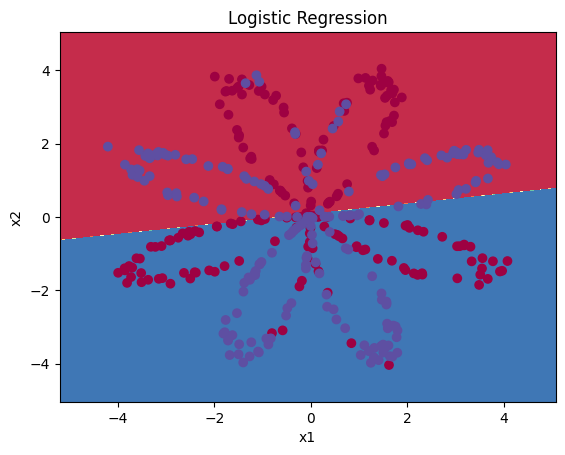

In [158]:

# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y, LR_predictions) + np.dot(1 - Y,1 - LR_predictions)) / float(Y.size) * 100) +
       '% ' + "(percentage of correctly labelled datapoints)")


## 1.1 - Defining the neural network structure ####

In [159]:
def layer_sizes(X, Y):
    n_x=X.shape[0]
    n_h=4
    n_y=Y.shape[0]
    return (n_x, n_h, n_y)

In [160]:

print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 50
The size of the output layer is: n_y = 1


## 1.2 - Initialize the model's parameters ####

In [161]:
def initialize_parameters(n_x, n_h, n_y):
    W1=np.random.randn(n_h,n_x)*0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h)*0.01
    b2=np.zeros((n_y,1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2, 
                  "b2": b2}
    return parameters

In [162]:
n_x, n_h, n_y = initialize_parameters_test_case()
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.00814343  0.0078047 ]
 [-0.01464054 -0.00154491]
 [-0.00092432 -0.00237875]
 [-0.00755663  0.01851438]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[ 0.00209097  0.01555016 -0.00569149 -0.01061797]]
b2 = [[0.]]


## 1.3 - The Loop ####

In [163]:
def forward_propagation(X, parameters):
    W1=parameters['W1']
    W2=parameters['W2']
    b1=parameters['b1']
    b2=parameters['b2']
    # Implement Forward Propagation 
    Z1=W1@X+b1
    A1=np.tanh(Z1)
    Z2=W2@A1+b2
    A2=sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

In [164]:
X_assess, parameters = forward_propagation_test_case()
A2, cache = forward_propagation(X_assess, parameters)
print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [165]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example    
    # Compute the cross-entropy cost
    logprobs=(np.multiply(np.log(A2),Y)+np.multiply(np.log(1-A2),1-Y))/(-1*m)
    cost=np.sum(logprobs)    
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect.     
    return cost

In [166]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1] 
    W1=parameters['W1']
    W2=parameters['W2']        
    A1=cache['A1']
    A2=cache['A2'] 
    dZ2=A2-Y
    dW2=(dZ2@A1.T)/m
    db2=np.sum(dZ2)/m
    dZ1=W2.T @ dZ2 *(1-pow(A1,2))
    dW1=(dZ1@X.T)/m
    db1=np.sum(dZ1)/m    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    return grads

In [167]:

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00040938 -0.00114994]
 [ 0.00165132 -0.0048634 ]
 [-0.0016893   0.00468412]
 [-0.00718417  0.0206147 ]]
db1 = -0.00934825504603505
dW2 = [[-0.42681787  0.3042082  -0.14180437  0.09815899]]
db2 = -0.45378898494752473


In [168]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1=parameters['W1']
    W2=parameters['W2']
    b2=parameters['b2']
    b1=parameters['b1']
    dW1=grads['dW1']
    dW2=grads['dW2']
    db2=grads['db2']
    db1=grads['db1']
    W1+=-learning_rate*dW1
    W2+=-learning_rate*dW2
    b1+=-learning_rate*db1
    b2+=-learning_rate*db2    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [169]:
parameters = update_parameters(parameters, grads)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00465884  0.00081726]
 [-0.02334355  0.02223879]
 [-0.0159072  -0.01403841]
 [ 0.01364982 -0.03719052]]
b1 = [[ 1.75602967]
 [-0.74998899]
 [ 0.330257  ]
 [-0.23815247]]
W2 = [[ 0.50160193 -0.37413992  0.17567979 -0.09486871]]
b2 = [[-0.75545322]]


## 1.4 - Integrate parts 1.1, 1.2 and 1.3 in nn_model() ####

In [170]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]    
    parameters=initialize_parameters(n_x, n_h, n_y)
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost=compute_cost(A2, Y, parameters)
        grads=backward_propagation(parameters, cache, X, Y) 
        parameters=update_parameters(parameters, grads, learning_rate=1.2)
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))

    return parameters

In [171]:

parameters = nn_model(X_assess, Y_assess, 4, num_iterations=10000, print_cost=False)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.76219744 -1.41879851]
 [ 0.65118069 -1.25135914]
 [ 0.570187   -1.11048036]
 [ 0.73202376 -1.37893765]]
b1 = [[-0.45479678]
 [-0.45479678]
 [-0.45479678]
 [-0.45479678]]
W2 = [[3.39640808 2.53842012 1.9765874  3.1680516 ]]
b2 = [[0.33741505]]


## 4.5 Predictions

In [172]:
def predict(parameters, X):
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2=forward_propagation(X, parameters)[0]
    predictions=(A2>0.5)
    return predictions

In [173]:

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693151
Cost after iteration 1000: 0.285903
Cost after iteration 2000: 0.254275
Cost after iteration 3000: 0.245022
Cost after iteration 4000: 0.240148
Cost after iteration 5000: 0.236945
Cost after iteration 6000: 0.234655
Cost after iteration 7000: 0.232945
Cost after iteration 8000: 0.231628
Cost after iteration 9000: 0.230584


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

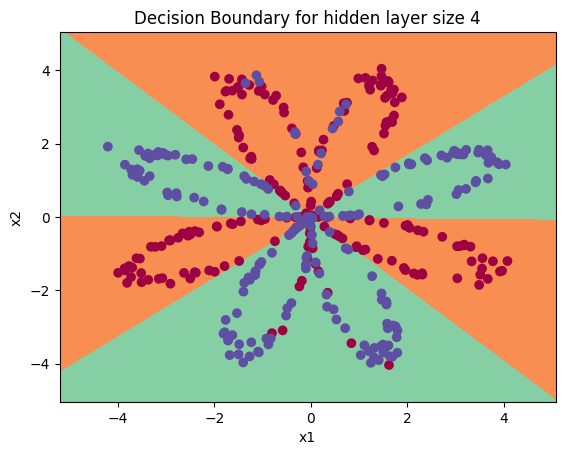

In [174]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [175]:
# show accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')

Accuracy: 90%


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_11572\1040160492.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print ('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100) + '%')


## 4.6 - Tuning hidden layer size  ###

C:\Users\Sajjad\AppData\Local\Temp\ipykernel_11572\1805721261.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 91.25 %
Accuracy for 4 hidden units: 90.0 %
Accuracy for 5 hidden units: 92.0 %
Accuracy for 20 hidden units: 92.0 %
Accuracy for 35 hidden units: 91.75 %
Accuracy for 50 hidden units: 90.25 %
Accuracy for 100 hidden units: 90.5 %


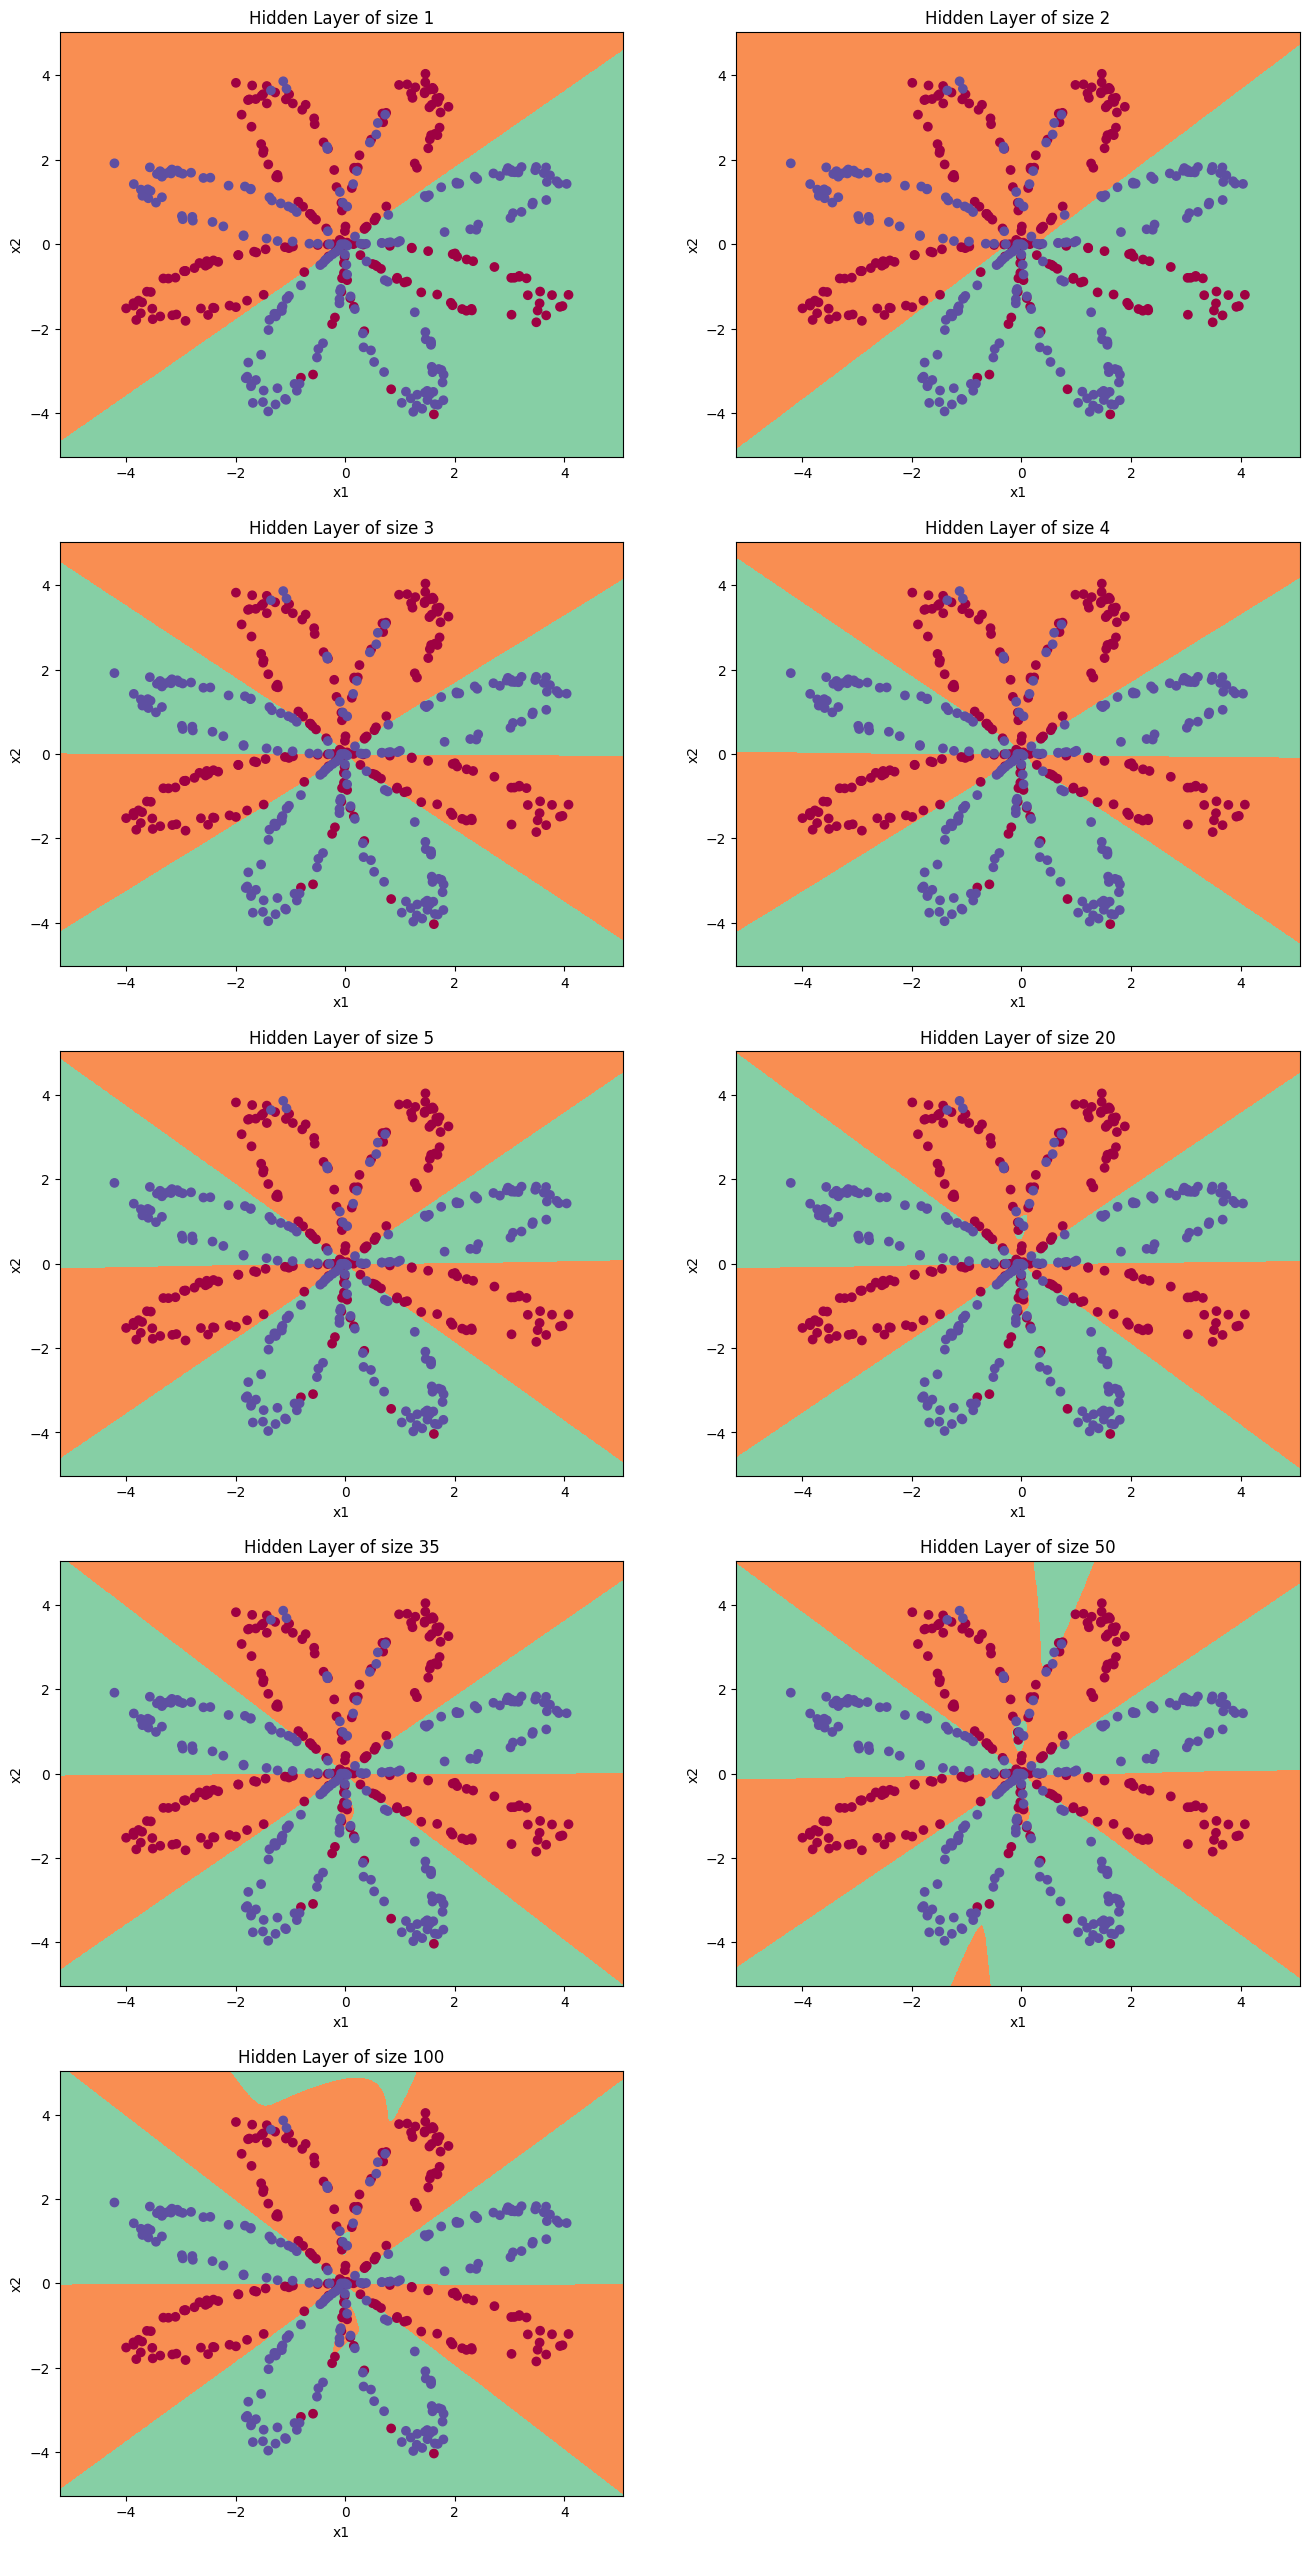

In [176]:

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20,35,50,100]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i + 1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1 - Y, 1 - predictions.T)) / float(Y.size) * 100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))